In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Solution to Exercise 4.8

In [23]:
# Define the data and parameters from part (c)

def f(x):
    return x+np.sin(3*x)

alpha = 2.0
ell = np.pi
a = -np.pi
b = np.pi

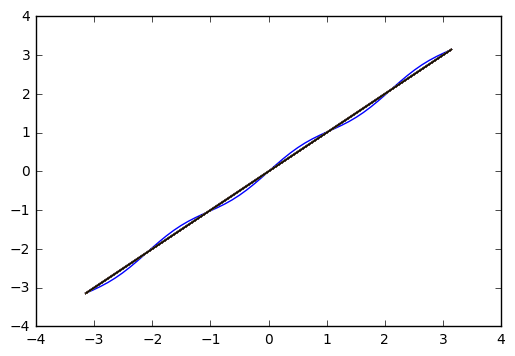

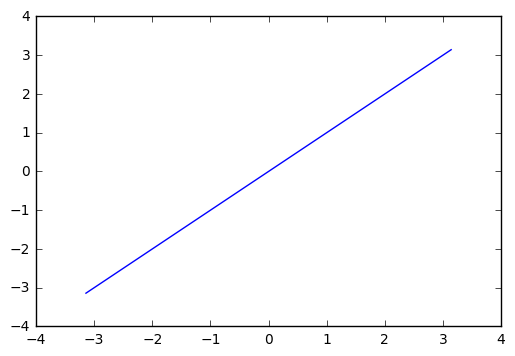

In [42]:
# An explicit scheme

# Define an explicit method

n = 49
x = np.linspace(-ell,ell,n+2) # <---------- ell is used here
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= alpha/dx**2 # <------- alpha is used here

r = 0.25
dt = r*dx**2

v = np.copy(f(x))
v[0] = a # <---------- a is used here
v[-1] = b # <--------- b is used here

t = 0

bdry_force = np.zeros(n)
bdry_force[0] = dt*alpha*a/dx**2 # <--------- a is used here and so is alpha
bdry_force[-1] = dt*alpha*b/dx**2 # <-------- b is used here and so is alpha

B = np.eye(n)-dt*A
count = 0

while t<10:
    v[1:-1] = np.dot(B,v[1:-1]) + bdry_force 
    t += dt
    count += 1
    if count%30 == 0:
        plt.plot(x,v)

plt.figure(2)
plt.plot(x,v)

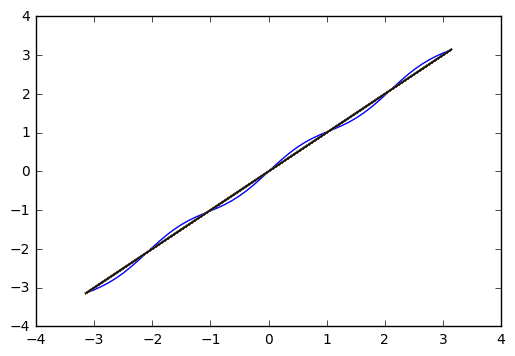

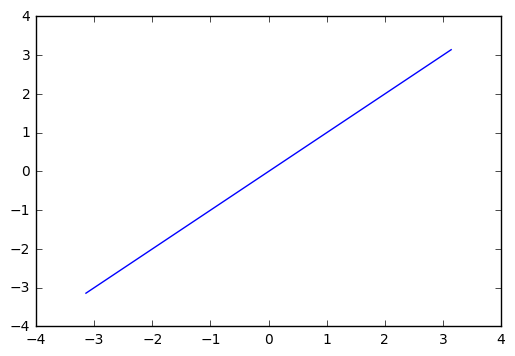

In [43]:
# An implicit scheme

# Define an explicit method

n = 49
x = np.linspace(-ell,ell,n+2) # <---------- ell is used here
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= alpha/dx**2 # <------- alpha is used here

r = 0.25
dt = r*dx**2

v = np.copy(f(x))
v[0] = a # <---------- a is used here
v[-1] = b # <--------- b is used here

t = 0

bdry_force = np.zeros(n)
bdry_force[0] = dt*alpha*a/dx**2 # <--------- a is used here and so is alpha
bdry_force[-1] = dt*alpha*b/dx**2 # <-------- b is used here and so is alpha

B = np.eye(n)+dt*A
B_inv = np.linalg.inv(B)

count = 0

while t<10:
    v[1:-1] = np.dot( B_inv ,v[1:-1] + bdry_force)
    t += dt
    count += 1
    if count%30 == 0:
        plt.plot(x,v)
        
plt.figure(2)
plt.plot(x,v)